In [1]:
import os
from glob import glob

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data_paths = sorted(glob('dataset/cifar/train/*.png'))
data_paths[0]

'dataset/cifar/train/0_frog.png'

In [5]:
path = data_paths[0]
path

'dataset/cifar/train/0_frog.png'

In [6]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [8]:
image.shape

TensorShape([32, 32, 3])

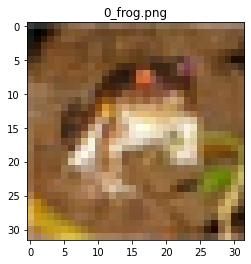

In [13]:
plt.title(os.path.basename(path))
plt.imshow(image)
plt.show()

In [15]:
data_paths[:10]

['dataset/cifar/train/0_frog.png',
 'dataset/cifar/train/10000_automobile.png',
 'dataset/cifar/train/10001_frog.png',
 'dataset/cifar/train/10002_frog.png',
 'dataset/cifar/train/10003_ship.png',
 'dataset/cifar/train/10004_ship.png',
 'dataset/cifar/train/10005_cat.png',
 'dataset/cifar/train/10006_deer.png',
 'dataset/cifar/train/10007_frog.png',
 'dataset/cifar/train/10008_airplane.png']

In [16]:
def read_image(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    return image

In [19]:
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image)

In [21]:
tf_image = next(iter(dataset))
tf_image.shape

TensorShape([32, 32, 3])

In [ ]:
plt.imshow(tf.image)
plt.show()

In [26]:
batch_size = 8

# batch로 묶기
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image)
dataset = dataset.batch(batch_size)

In [27]:
tf_image = next(iter(dataset))

In [28]:
tf_image.shape

TensorShape([8, 32, 32, 3])

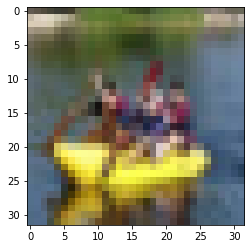

In [30]:
plt.imshow(tf_image[4])
plt.show()

In [31]:
# shuffle

dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image)
dataset = dataset.batch(batch_size)
dataset = dataset.shuffle(buffer_size=len(data_paths))

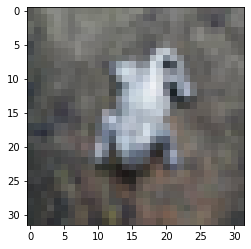

In [32]:
tf_images = next(iter(dataset))

plt.imshow(tf_images[0])
plt.show()

In [33]:
# label하고 같이 넣기

path

'dataset/cifar/train/0_frog.png'

In [35]:
class_name = path.split('_')[-1].replace('.png', '')

In [36]:
def get_label(path):
    return path.split('_')[-1].replace('.png', '')

In [37]:
path, get_label(path)

('dataset/cifar/train/0_frog.png', 'frog')

In [38]:
label_names = [get_label(path) for path in data_paths]

In [39]:
label_names[:10]

['frog',
 'automobile',
 'frog',
 'frog',
 'ship',
 'ship',
 'cat',
 'deer',
 'frog',
 'airplane']

In [40]:
class_names = np.unique(label_names)
class_names

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [44]:
onehot_encoding = np.array(class_names == 'frog', np.uint8)
onehot_encoding

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [46]:
def onehot_encoding(label):
    return np.array(class_names == 'frog', np.uint8)

In [47]:
def get_label(path):
    return path.split('_')[-1].replace('.png', '')

In [48]:
data_paths[:10]

['dataset/cifar/train/0_frog.png',
 'dataset/cifar/train/10000_automobile.png',
 'dataset/cifar/train/10001_frog.png',
 'dataset/cifar/train/10002_frog.png',
 'dataset/cifar/train/10003_ship.png',
 'dataset/cifar/train/10004_ship.png',
 'dataset/cifar/train/10005_cat.png',
 'dataset/cifar/train/10006_deer.png',
 'dataset/cifar/train/10007_frog.png',
 'dataset/cifar/train/10008_airplane.png']

In [50]:
label_names[:10]

['frog',
 'automobile',
 'frog',
 'frog',
 'ship',
 'ship',
 'cat',
 'deer',
 'frog',
 'airplane']

In [52]:
def read_image_label(path, label):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    return image, label

In [54]:
dataset = tf.data.Dataset.from_tensor_slices((data_paths, label_names))
dataset = dataset.map(read_image_label)
dataset = dataset.batch(batch_size)
dataset = dataset.repeat()

In [55]:
image, label = next(iter(dataset))

In [56]:
image.shape, label.shape

(TensorShape([8, 32, 32, 3]), TensorShape([8]))

In [57]:
label[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'frog'>

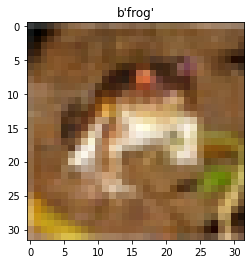

In [58]:
plt.imshow(image[0])
plt.title(np.array(label[0]))
plt.show()

In [60]:
# tensorflow 함수로 label 얻기

path

'dataset/cifar/train/0_frog.png'

In [61]:
def onehot_encoding(label):
    return np.array(class_names == label, np.uint8)

In [65]:
fname = tf.strings.split(path, '_')[-1]
fname

<tf.Tensor: shape=(), dtype=string, numpy=b'frog.png'>

In [66]:
class_name = tf.strings.regex_replace(fname, '.png', '')
class_name

<tf.Tensor: shape=(), dtype=string, numpy=b'frog'>

In [67]:
class_names

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [71]:
onehot_encoding = tf.cast(class_names == class_name, tf.uint8)
onehot_encoding

<tf.Tensor: shape=(10,), dtype=uint8, numpy=array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)>

In [72]:
def get_label(path):
    fname = tf.strings.split(path, '_')[-1]
    class_name = tf.strings.regex_replace(fname, '.png', '')
    onehot_encoding = tf.cast(class_names == class_name, tf.uint8)
    return onehot_encoding

In [74]:
def read_image_label(path):
    # read image
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    
    # get label
    label = get_label(path)
    return image, label

In [75]:
dataset = tf.data.Dataset.from_tensor_slices((data_paths))
dataset = dataset.map(read_image_label)
dataset = dataset.batch(batch_size)
dataset = dataset.repeat()

In [76]:
image, label = next(iter(dataset))

In [77]:
image.shape

TensorShape([8, 32, 32, 3])

In [78]:
label.shape

TensorShape([8, 10])

In [79]:
label[0]

<tf.Tensor: shape=(10,), dtype=uint8, numpy=array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)>

/Users/sengjeawang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


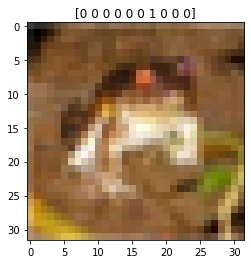

In [80]:
plt.imshow(image[0])
plt.title(np.array(label[0]))
plt.show()

In [ ]:
# 필요한거 정리

In [ ]:
data_paths
label_names = [get_label(path) for path in data_paths]
class_names = np.unique(label_names)

In [ ]:
def get_label(path):
    fname = tf.strings.split(path, '_')[-1]
    class_name = tf.strings.regex_replace(fname, '.png', '')
    onehot_encoding = tf.cast(class_names == class_name, tf.uint8)
    return onehot_encoding

In [ ]:
def read_image_label(path):
    # read image
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    
    # get label
    label = get_label(path)
    return image, label

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((data_paths))
dataset = dataset.map(read_image_label)
dataset = dataset.batch(batch_size)
dataset = dataset.repeat()